In [1]:
from functies import *
from classes import *
import sympy as sp
import numpy as np

In [2]:
def snelheidsmodel_pseudosnelheid(t, parameters):
    c_0, k, orde = parameters
    '''
    c_0 = beginconcentratie
    k = pseudosnelheidsconstante
    orde = orde van de reactie
    '''
    if c_0 < 0 or k < 0:
        return np.full(np.shape(t), np.inf)
    if orde == 1:
        c = c_0 * np.exp(-k*t)
    else:
        c = (c_0**(1-orde) - k*(1-orde)*t)**(1/(1-orde))
    return c

def snelheidsmodel_1eorde(t,parameters):
    c_0, k = parameters
    return c_0 * np.exp(-k*t)

def snelheidsmodel_0eorde(t,params):
    c_0, k = params
    return c_0 - k*t

def snelheidsmodel_2eorde(t,params):
    c_0, k = params
    return 1/(1/c_0 + k*t)

def snelheidsmodel_2eorde_linearised(t,params):
    return 1/snelheidsmodel_2eorde(t,params)

def snelheidsmodel_1eorde_linearised(t,params):
    return np.log(snelheidsmodel_1eorde(t,params))


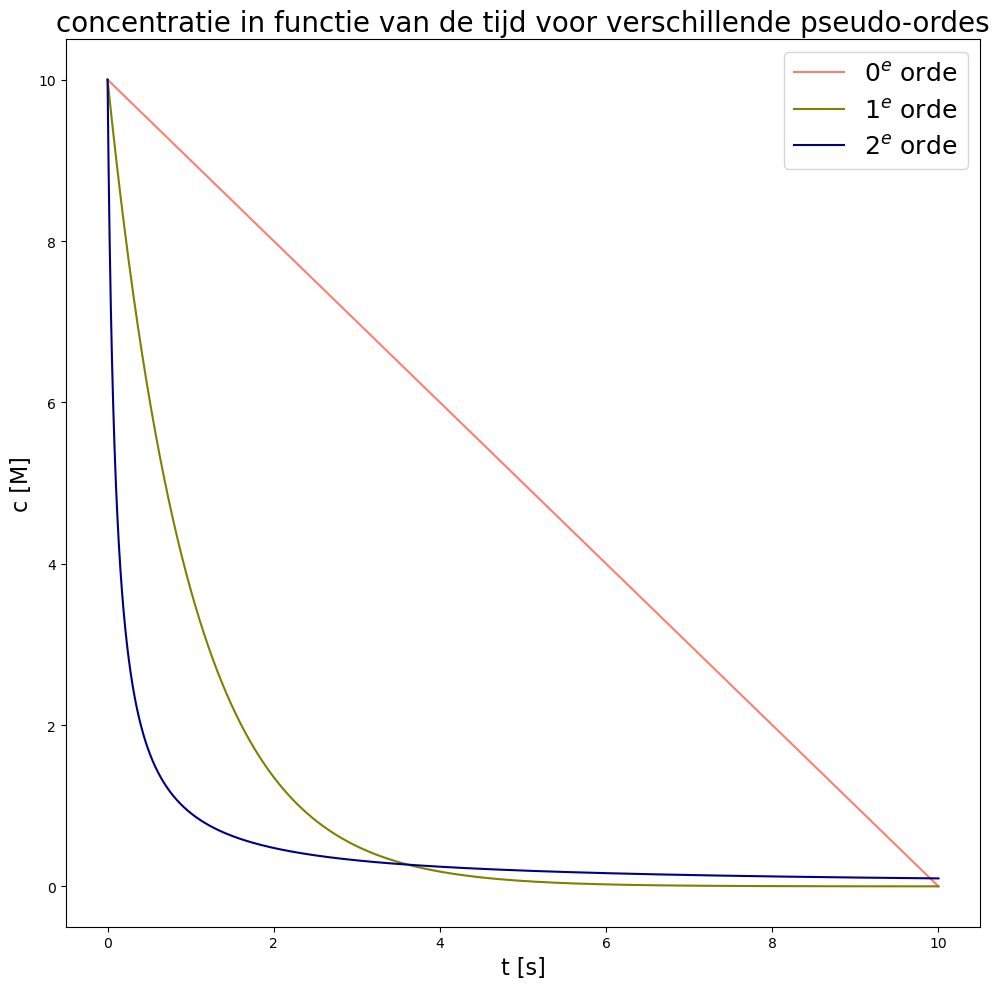

In [3]:
###plot van de concentratie in functie van de tijd (voor de voorbereidingsopgave)
fig, ax = plt.subplots(1,1,figsize = (10,10))
tijd = np.linspace(0,10,10000)
ax.plot(tijd, snelheidsmodel_0eorde(tijd,[10,1]), color = 'salmon',label = '$0^e$ orde')
ax.plot(tijd, snelheidsmodel_1eorde(tijd,[10,1]), color = 'olive', label = '$1^e$ orde')
ax.plot(tijd, snelheidsmodel_2eorde(tijd,[10,1]), color = 'navy', label = '$2^e$ orde')
ax.set_xlabel('t [s]',fontsize = 16)
ax.set_ylabel('c [M]',fontsize = 16)
ax.legend(fontsize = 18)
ax.set_title('concentratie in functie van de tijd voor verschillende pseudo-ordes',fontsize = 20)
plt.tight_layout();plt.savefig('voorbereiding_reactieordes.png');plt.show()

In [4]:
#prepareer de data van de eerste set metingen
"""
absorbanties_set_1 = []
tijd_0 = (10,56)
tijden_set_1 = []
for i in range(36): #alle meetpunten afgaan --let op! het is 0.06, niet 0.006!
    adres = "C:/Users/User/Documents/Cas/Unif/2e can/experimentele/week 12 chemie I/NaOH0.006/NaOH0.006_Absorbance__"+str(i)+'__'+str(i)+'.txt'
    file = open(adres, 'rt')
    tekst = file.read();file.close()
    tekst = tekst.split('590,095	')
    meting = float(tekst[1][:8].replace(',','.'))
    absorbanties_set_1.append(meting)
    
    datum = tekst[0].split('Mon Dec 09 11:')[1][:5]
    minuut = int(datum[:2]);seconde = int(datum[3:])

    tijdsverschil = (minuut-tijd_0[0])*60 + (seconde-tijd_0[1])
    tijden_set_1.append(tijdsverschil)

absorbanties_set_1 = np.array(absorbanties_set_1)
tijden_set_1 = np.array(tijden_set_1)
print(np.shape(absorbanties_set_1))
print(np.shape(tijden_set_1))
"""
epsilon = 87000 #M^-1 cm^-1
l = 1 #cm

#concentraties_set_1 = absorbanties_set_1/(epsilon*l)

#de data van de Bulgaar/Indiër

data_1=np.array([0.6777,0.61495,0.55706,0.50277,0.45396,0.4072,0.36515,0.32651,0.2922,0.26294,0.23723,0.21136,0.18762,0.16799,0.14923,0.13225,0.11662,0.10335])
data_2=np.array([0.75223,0.71715,0.68048,0.6455,0.61031,0.57533,0.54337,0.51178,0.48297,0.45412,0.4277,0.40186,0.37751,0.3522,0.32759,0.30677,0.28685,0.26855,0.25045])
concentraties_set_1 = data_1/(epsilon*l)
tijden_set_1 = np.array([20*i for i in range(len(data_1))])

fouten_set_1 = 0.02*concentraties_set_1


Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 487992.89026489074
        x: [ 9.600e-06  2.100e-08  1.000e+00]
      nit: 0
      jac: [ 1.260e+11 -3.373e+08 -3.582e+05]
 hess_inv: [[1 0 0]
            [0 1 0]
            [0 0 1]]
     nfev: 24
     njev: 3
[[9.60002784176157e-06, 9.600027841761572e-06], [1.0606595136941496e-08, 1.060659513695685e-08], [1.059119031075691, 1.5]]
c_0 heeft als waarde: 9.6e-06 + 2.7842e-11 - -2.7842e-11 met 68% betrouwbaarheidsinterval: [9.6e-06, 9.6e-06] 
k heeft als waarde: 2.1e-08 + -1.0393e-08 - 1.0393e-08 met 68% betrouwbaarheidsinterval: [1.0607e-08, 1.0607e-08] 
orde heeft als waarde: 1 + 0.5 - -0.059119 met 68% betrouwbaarheidsinterval: [1.0591, 1.5] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0
De gereduceerde chi^2 waarde is: 32533
[[9.6e-06, (-2.7841761570377745e-11, 2.784176157207181e-11), 'S'], [2.1e-08, (1.0393404863058503e-08,

c:\Users\User\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
c:\Users\User\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\User\AppData\Local\Temp\ipykernel_5920\2029746687.py:13: RuntimeWarning: invalid value encountered in power
  c = (c_0**(1-orde) - k*(1-orde)*t)**(1/(1-orde))


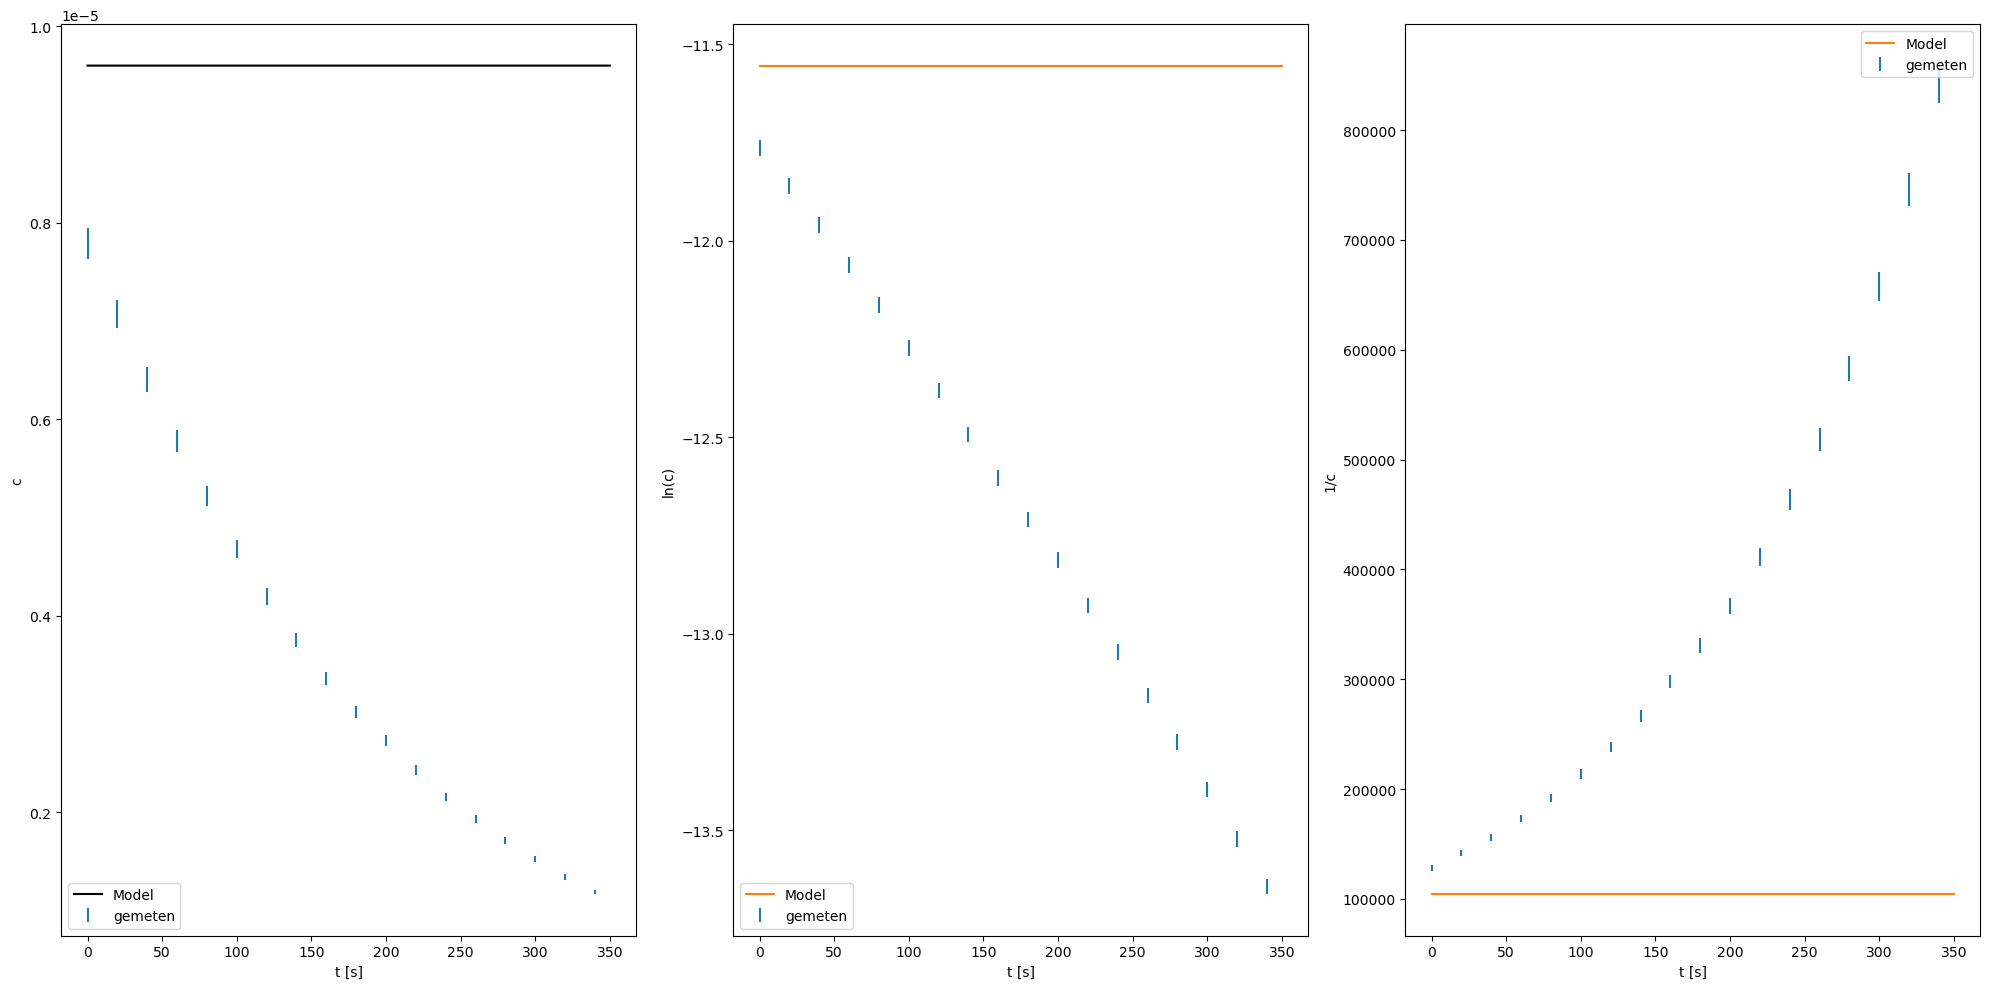

In [5]:
# eerste set metingen: we gokken de orde
def initial_vals(x,y):
    return [0.96e-5,2.1e-8, 1]

parameters = ['c_0', 'k', 'orde']
outp = fit(parameters, snelheidsmodel_pseudosnelheid, initial_vals, tijden_set_1, concentraties_set_1, fouten_set_1)
print(outp)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]


fig,ax = plt.subplots(1,3, figsize = (20,10))
ax[0].errorbar(tijden_set_1,concentraties_set_1,linestyle = '', label = 'gemeten', yerr = fouten_set_1)
ax[1].errorbar(tijden_set_1,np.log(concentraties_set_1), linestyle = '', label = 'gemeten', yerr = fouten_set_1/concentraties_set_1)
ax[2].errorbar(tijden_set_1,1/concentraties_set_1, linestyle = '', label = 'gemeten', yerr = fouten_set_1/concentraties_set_1**2)
ax[0].set_ylabel('c')
ax[1].set_ylabel('ln(c)')
ax[2].set_ylabel('1/c')
t = np.linspace(0,350)
ax[0].plot(t, snelheidsmodel_pseudosnelheid(t, parameterwaarden),color = 'black',label = 'Model')
ax[1].plot(t, np.log(snelheidsmodel_pseudosnelheid(t, parameterwaarden)),label = 'Model')
ax[2].plot(t, 1/snelheidsmodel_pseudosnelheid(t, parameterwaarden),label = 'Model')
for i in range(3):
    ax[i].set_xlabel('t [s]')
    ax[i].legend()
plt.tight_layout();plt.show()

In [6]:
#we zien duidelijk dat het geen 2e orde is dus dat gooien we al weg
# eerste set metingen 0e orde
def initial_vals(x,y):
    return [0.69e-5,2e-8]


#help(plot_fit(x_val, y_val, x_variance, y_variance, x_as_titel, y_as_titel, titel, model, parameter_vals, chi_2, p, save_name = None, size = None, savefig = False,fontsize = 5, titlesize = None, axsize = None):)

parameters = ['c_0', 'k']
outp = fit(parameters, snelheidsmodel_0eorde, initial_vals, tijden_set_1, concentraties_set_1, fouten_set_1)
print(outp)
for met in outp:
    print('\n')
    latex_print_meting(met)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]


Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1136.4313459251223
        x: [ 6.900e-06  1.798e-08]
      nit: 1
      jac: [ 1.076e+09  9.629e+12]
 hess_inv: [[ 1.000e+00  3.460e-03]
            [ 3.460e-03  1.197e-05]]
     nfev: 116
     njev: 35
[[6.783066056057068e-06, 6.902346429810541e-06], [1.7886187257996772e-08, 1.801894588735307e-08]]
c_0 heeft als waarde: 6.9e-06 + 2.3451e-09 - 1.1694e-07 met 68% betrouwbaarheidsinterval: [6.7831e-06, 6.9023e-06] 
k heeft als waarde: 1.7982e-08 + 3.6955e-11 - 9.5804e-11 met 68% betrouwbaarheidsinterval: [1.7886e-08, 1.8019e-08] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 6.4804e-232
De gereduceerde chi^2 waarde is: 71.027
[[6.900001305915825e-06, (1.1693524985875669e-07, 2.345123894716093e-09), 'S'], [1.7981991138339124e-08, (9.58038803423522e-11, 3.6954749013944695e-11), 'S']]


[6.900001305915825e-06, (1.1693524985875669e-07

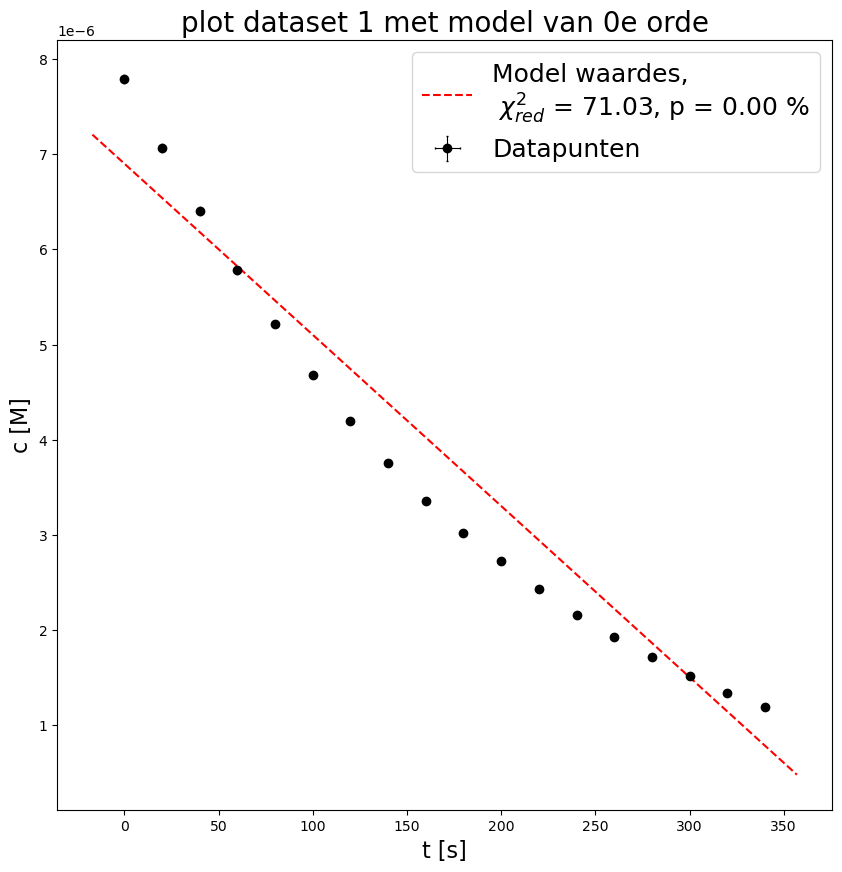

In [7]:
#plotten jeej
plot_fit(tijden_set_1, concentraties_set_1, np.full(np.shape(tijden_set_1),0), fouten_set_1**2/12, 't [s]', 'c [M]', 'plot dataset 1 met model van 0e orde', snelheidsmodel_0eorde,
          parameterwaarden, 71.027, 4.7e-28, save_name = 'dataset_1_fit_0e_orde.png',fontsize = 18, titlesize = 20, axsize = 16)

In [8]:
# eerste set metingen 2e orde
def initial_vals(x,y):
    return [0.96e-5,2.1e-8]


parameters = ['c_0', 'k']
outp = fit(parameters, snelheidsmodel_2eorde, initial_vals, tijden_set_1, concentraties_set_1, fouten_set_1)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]
for met in outp:
    latex_print_meting(met)
"""
fig,ax = plt.subplots(1,1, figsize = (10,10))
ax.errorbar(tijden_set_1,1/concentraties_set_1,linestyle = '', label = 'gemeten', yerr = fouten_set_1/(concentraties_set_1**2), color = 'black', marker = 'o')
ax.set_ylabel('1/c [M$^{-1}$]',fontsize = 15)
t = np.linspace(0,350)
ax.plot(t, 1/snelheidsmodel_2eorde(t, parameterwaarden),linestyle = '--',label = 'Model')
ax.set_title('plot dataset 1 met model van 2e orde',fontsize = 20)
ax.set_xlabel('t [s]',fontsize = 15)
ax.legend(fontsize = 18)
plt.tight_layout();plt.savefig('dataset_1_fit_2e_orde.png');plt.show()"""

Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1135.3554303930248
        x: [ 9.472e-06  1.566e+03]
      nit: 20
      jac: [ 1.824e+01  0.000e+00]
 hess_inv: [[ 6.076e-15  3.240e-07]
            [ 3.240e-07  7.569e+01]]
     nfev: 195
     njev: 61
[[9.333063320703668e-06, 9.626304455457822e-06], [1549.2960010352085, 1582.014725683022]]
c_0 heeft als waarde: 9.4716e-06 + 1.5469e-07 - 1.3855e-07 met 68% betrouwbaarheidsinterval: [9.3331e-06, 9.6263e-06] 
k heeft als waarde: 1565.5 + 16.489 - 16.23 met 68% betrouwbaarheidsinterval: [1549.3, 1582] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 1.1025e-231
De gereduceerde chi^2 waarde is: 70.96
$(94.7 \pm 1.5)\cdot 10^{-7}$
$(1565.5 \pm 16.5)\cdot 10^{0}$


"\nfig,ax = plt.subplots(1,1, figsize = (10,10))\nax.errorbar(tijden_set_1,1/concentraties_set_1,linestyle = '', label = 'gemeten', yerr = fouten_set_1/(concentraties_set_1**2), color = 'black', marker = 'o')\nax.set_ylabel('1/c [M$^{-1}$]',fontsize = 15)\nt = np.linspace(0,350)\nax.plot(t, 1/snelheidsmodel_2eorde(t, parameterwaarden),linestyle = '--',label = 'Model')\nax.set_title('plot dataset 1 met model van 2e orde',fontsize = 20)\nax.set_xlabel('t [s]',fontsize = 15)\nax.legend(fontsize = 18)\nplt.tight_layout();plt.savefig('dataset_1_fit_2e_orde.png');plt.show()"

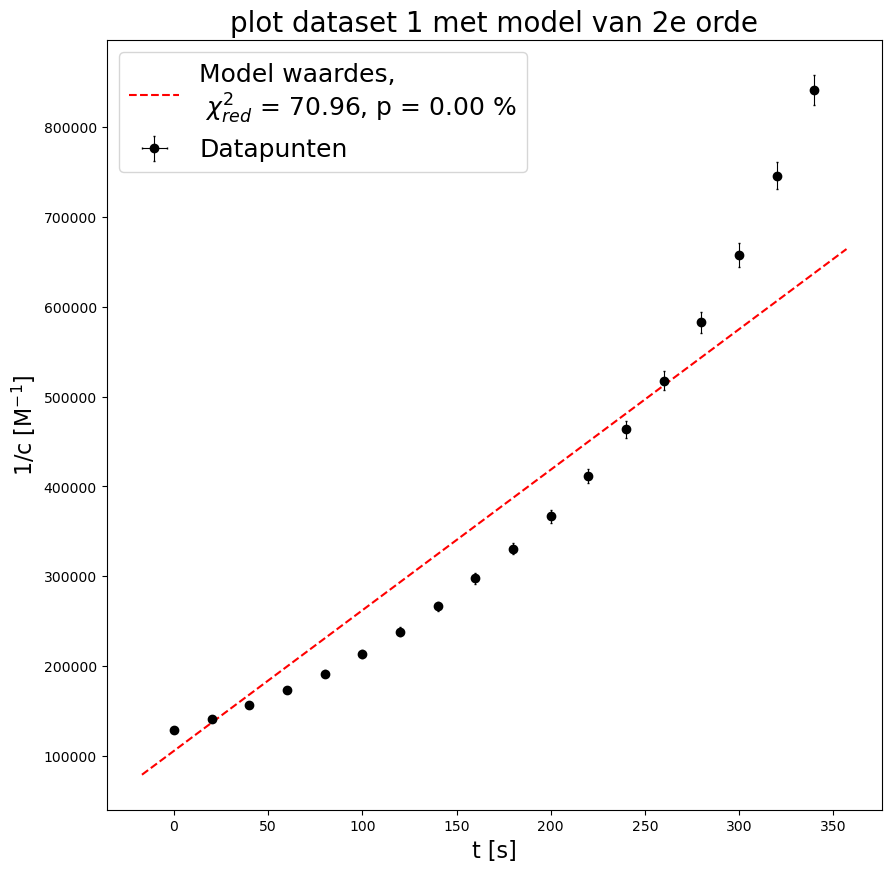

In [9]:
plot_fit(tijden_set_1, 1/concentraties_set_1, np.full(np.shape(tijden_set_1),0), (fouten_set_1/(concentraties_set_1**2))**2, 't [s]', '1/c [M$^{-1}$]', 'plot dataset 1 met model van 2e orde', snelheidsmodel_2eorde_linearised,
          parameterwaarden, 70.96, 1.1e-231, save_name = 'dataset_1_fit_2e_orde.png',fontsize = 18, titlesize = 20, axsize = 16)

In [10]:
# eerste set metingen: 1e orde
def initial_vals(x,y):
    return [0.96e-5,2.1e-8]

parameters = ['c_0', 'k']
outp = fit(parameters, snelheidsmodel_1eorde, initial_vals, tijden_set_1, concentraties_set_1, fouten_set_1)
k1 = sp.symbols('k1')
K1 = vector_to_datapunt(outp[1],k1)
print(outp)
for met in outp:
    latex_print_meting(met)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]

"""
fig,ax = plt.subplots(1,1, figsize = (10,10))
ax.errorbar(tijden_set_1,np.log(concentraties_set_1), linestyle = '', label = 'gemeten', yerr = fouten_set_1/concentraties_set_1, color = 'black', marker = 'o')
ax.set_ylabel('ln(c) [ln(M)]',fontsize=15)
t = np.linspace(0,350)
ax.plot(t, np.log(snelheidsmodel_1eorde(t, parameterwaarden)),label = 'Model',linestyle = '--')
ax.set_title('plot dataset 1 met model van 1e orde',fontsize = 20)
ax.set_xlabel('t [s]',fontsize = 15)
ax.legend(fontsize = 18)
plt.tight_layout();plt.savefig('dataset_1_fit_1e_orde.png');plt.show()"""

Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 13.173611129255722
        x: [ 8.022e-06  5.514e-03]
      nit: 17
      jac: [ 2.021e+02 -1.705e-01]
 hess_inv: [[ 2.570e-15  1.359e-12]
            [ 1.359e-12  9.935e-10]]
     nfev: 192
     njev: 60
[[7.97201156101814e-06, 8.08727793809073e-06], [0.0054790807752367575, 0.005550083755141402]]
c_0 heeft als waarde: 8.0222e-06 + 6.5084e-08 - 5.0183e-08 met 68% betrouwbaarheidsinterval: [7.972e-06, 8.0873e-06] 
k heeft als waarde: 0.0055144 + 3.5675e-05 - 3.5328e-05 met 68% betrouwbaarheidsinterval: [0.0054791, 0.0055501] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0.66002
De gereduceerde chi^2 waarde is: 0.82335
[[8.022194313804986e-06, (5.018275278684625e-08, 6.508362428574436e-08), 'S'], [0.005514408390461451, 3.567536467995094e-05, 'S']]
[8.022194313804986e-06, (5.018275278684625e-08, 6.508362428574436e-08), 'S']
$802.2^

"\nfig,ax = plt.subplots(1,1, figsize = (10,10))\nax.errorbar(tijden_set_1,np.log(concentraties_set_1), linestyle = '', label = 'gemeten', yerr = fouten_set_1/concentraties_set_1, color = 'black', marker = 'o')\nax.set_ylabel('ln(c) [ln(M)]',fontsize=15)\nt = np.linspace(0,350)\nax.plot(t, np.log(snelheidsmodel_1eorde(t, parameterwaarden)),label = 'Model',linestyle = '--')\nax.set_title('plot dataset 1 met model van 1e orde',fontsize = 20)\nax.set_xlabel('t [s]',fontsize = 15)\nax.legend(fontsize = 18)\nplt.tight_layout();plt.savefig('dataset_1_fit_1e_orde.png');plt.show()"

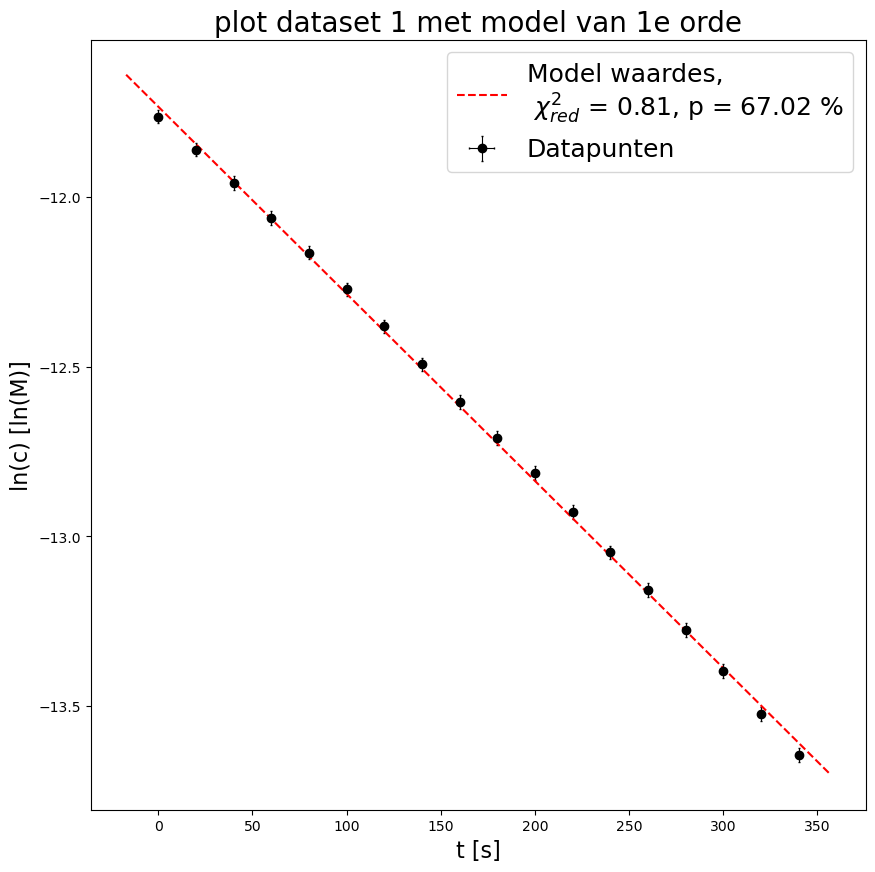

In [11]:
plot_fit(tijden_set_1, np.log(concentraties_set_1), np.full(np.shape(tijden_set_1),0), (fouten_set_1/(concentraties_set_1))**2, 't [s]', 'ln(c) [ln(M)]', 'plot dataset 1 met model van 1e orde', snelheidsmodel_1eorde_linearised,
          parameterwaarden, 0.81, 0.6702, save_name = 'dataset_1_fit_1e_orde.png',fontsize = 18, titlesize = 20, axsize = 16)

In [12]:
#prepareer de data van de tweede set metingen
absorbanties_set_2 = []
tijd_0 = (26,16)
tijden_set_2 = []
for i in range(36): #alle meetpunten afgaan --let op! het is 0.06, niet 0.006!
    if i >= 10:
        numstring = str(i)
    else:
        numstring = '0'+str(i)
    adres = "C:/Users/User/Documents/Cas/Unif/2e can/experimentele/week 12 chemie I/NaOH0.03/0.03MnaOh_Absorbance__"+str(i)+'__000'+numstring+'.txt'
    file = open(adres, 'rt')
    tekst = file.read();file.close()
    tekst = tekst.split('590,095	')

    meting = float(tekst[1][:6].replace(',','.'))
    absorbanties_set_2.append(meting)
    
    datum = tekst[0].split('Mon Dec 09 11:')[1][:5]
    minuut = int(datum[:2]);seconde = int(datum[3:])

    tijdsverschil = (minuut-tijd_0[0])*60 + (seconde-tijd_0[1])
    tijden_set_2.append(tijdsverschil)

absorbanties_set_2 = np.array(absorbanties_set_2)[::2]
tijden_set_2 = np.array(tijden_set_2)[::2]
print(absorbanties_set_2)
print(tijden_set_2)

epsilon = 87000 #M^-1 cm^-1
l = 1 #cm
concentraties_set_2 = absorbanties_set_2/(epsilon*l)
tijden_set_2 = tijden_set_2

fouten_set_2  = 0.02*concentraties_set_2 

[0.9762 0.9247 0.8751 0.827  0.7809 0.7382 0.695  0.6554 0.6181 0.5816
 0.5461 0.5104 0.4771 0.4489 0.4186 0.3895 0.3612 0.3372]
[  0  20  39  59  80  99 119 139 159 179 199 219 239 260 279 299 320 339]


In [13]:
# tweede set metingen: we bepalen de orde
def initial_vals(x,y):
    return [1.087e-5,2.1e-8, 0]


parameters = ['c_0', 'k', 'orde']
outp = fit(parameters, snelheidsmodel_pseudosnelheid, initial_vals, tijden_set_2, concentraties_set_2 , fouten_set_2 )
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]
"""
fig,ax = plt.subplots(1,3, figsize = (30,10))
ax[0].errorbar(tijden_set_2,concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2 )
ax[1].errorbar(tijden_set_2,np.log(concentraties_set_2 ),linestyle = '', label = 'gemeten', yerr = fouten_set_2 /concentraties_set_2 )
ax[2].errorbar(tijden_set_2,1/concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2 /(concentraties_set_2 **2))
ax[0].set_ylabel('c [M]',fontsize = 15)
ax[1].set_ylabel('ln(c) [ln(M)]',fontsize = 15)
ax[2].set_ylabel('1/c [$M^{-1}]',fontsize = 15)
t = np.linspace(0,350)
ax[0].plot(t, snelheidsmodel_pseudosnelheid(t, parameterwaarden),label = 'Model')
ax[1].plot(t, np.log(snelheidsmodel_pseudosnelheid(t, parameterwaarden)),label = 'Model')
ax[2].plot(t, 1/snelheidsmodel_pseudosnelheid(t, parameterwaarden),label = 'Model')
for i in range(3):
    ax[i].set_xlabel('t [s]',fontsize = 20)
    ax[i].legend(fontsize = 18)
plt.tight_layout();plt.show()"""

Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 89.17371973570793
        x: [ 1.087e-05  2.100e-08  0.000e+00]
      nit: 0
      jac: [ 4.427e+08  1.045e+12  2.049e+04]
 hess_inv: [[1 0 0]
            [0 1 0]
            [0 0 1]]
     nfev: 24
     njev: 3
[[1.0509821673943114e-05, 1.0878070360487808e-05], [2.095960482777816e-08, 2.2145607054323067e-08], [0.0001651140201637733, 0.0001651140201637733]]
c_0 heeft als waarde: 1.087e-05 + 8.0704e-09 - 3.6018e-07 met 68% betrouwbaarheidsinterval: [1.051e-05, 1.0878e-05] 
k heeft als waarde: 2.1e-08 + 1.1456e-09 - 4.0395e-11 met 68% betrouwbaarheidsinterval: [2.096e-08, 2.2146e-08] 
orde heeft als waarde: 0 + 0.00016511 - -0.00016511 met 68% betrouwbaarheidsinterval: [0.00016511, 0.00016511] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 1.4141e-12
De gereduceerde chi^2 waarde is: 5.9449


c:\Users\User\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


"\nfig,ax = plt.subplots(1,3, figsize = (30,10))\nax[0].errorbar(tijden_set_2,concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2 )\nax[1].errorbar(tijden_set_2,np.log(concentraties_set_2 ),linestyle = '', label = 'gemeten', yerr = fouten_set_2 /concentraties_set_2 )\nax[2].errorbar(tijden_set_2,1/concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2 /(concentraties_set_2 **2))\nax[0].set_ylabel('c [M]',fontsize = 15)\nax[1].set_ylabel('ln(c) [ln(M)]',fontsize = 15)\nax[2].set_ylabel('1/c [$M^{-1}]',fontsize = 15)\nt = np.linspace(0,350)\nax[0].plot(t, snelheidsmodel_pseudosnelheid(t, parameterwaarden),label = 'Model')\nax[1].plot(t, np.log(snelheidsmodel_pseudosnelheid(t, parameterwaarden)),label = 'Model')\nax[2].plot(t, 1/snelheidsmodel_pseudosnelheid(t, parameterwaarden),label = 'Model')\nfor i in range(3):\n    ax[i].set_xlabel('t [s]',fontsize = 20)\n    ax[i].legend(fontsize = 18)\nplt.tight_layout();plt.show()"

In [14]:
# tweede set metingen: 0e orde en 1e orde want we zien duidelijk dat het geen tweede orde is
#0e orde
def initial_vals(x,y):
    return [1.087e-5,2.1e-8]


parameters = ['c_0', 'k']
outp = fit(parameters, snelheidsmodel_0eorde, initial_vals, tijden_set_2, concentraties_set_2 , fouten_set_2 )
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]
print(outp)
for met in outp:
    print('\n')
    latex_print_meting(met)
"""
fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.errorbar(tijden_set_2,concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2,color = 'black',marker = 'o')
ax.set_ylabel('c')
t = np.linspace(0,350)
ax.plot(t, snelheidsmodel_0eorde(t, parameterwaarden),label = 'Model',linestyle = '--')
ax.set_xlabel('t [s]',fontsize = 20)
ax.set_title('plot dataset 2 met model van 0e orde',fontsize = 20)
ax.legend(fontsize = 18)
plt.tight_layout();plt.savefig('dataset_2_fit_0e_orde.png');plt.show()"""

Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 89.17371973570793
        x: [ 1.087e-05  2.100e-08]
      nit: 0
      jac: [ 4.427e+08  1.045e+12]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 153
     njev: 47
[[1.051260533783288e-05, 1.0875286696597457e-05], [2.0973422061089003e-08, 2.2131789821013086e-08]]
c_0 heeft als waarde: 1.087e-05 + 5.2867e-09 - 3.5739e-07 met 68% betrouwbaarheidsinterval: [1.0513e-05, 1.0875e-05] 
k heeft als waarde: 2.1e-08 + 1.1318e-09 - 2.6578e-11 met 68% betrouwbaarheidsinterval: [2.0973e-08, 2.2132e-08] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 3.5509e-12
De gereduceerde chi^2 waarde is: 5.5734
[[1.087e-05, (3.573946621671201e-07, 5.286696597457861e-09), 'S'], [2.1e-08, (2.657793891099651e-11, 1.1317898210130865e-09), 'S']]


[1.087e-05, (3.573946621671201e-07, 5.286696597457861e-09), 'S']
$108.7^{-3.573946621671201}_{+0.05286696597457

"\nfig,ax = plt.subplots(1,1,figsize = (10,10))\nax.errorbar(tijden_set_2,concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2,color = 'black',marker = 'o')\nax.set_ylabel('c')\nt = np.linspace(0,350)\nax.plot(t, snelheidsmodel_0eorde(t, parameterwaarden),label = 'Model',linestyle = '--')\nax.set_xlabel('t [s]',fontsize = 20)\nax.set_title('plot dataset 2 met model van 0e orde',fontsize = 20)\nax.legend(fontsize = 18)\nplt.tight_layout();plt.savefig('dataset_2_fit_0e_orde.png');plt.show()"

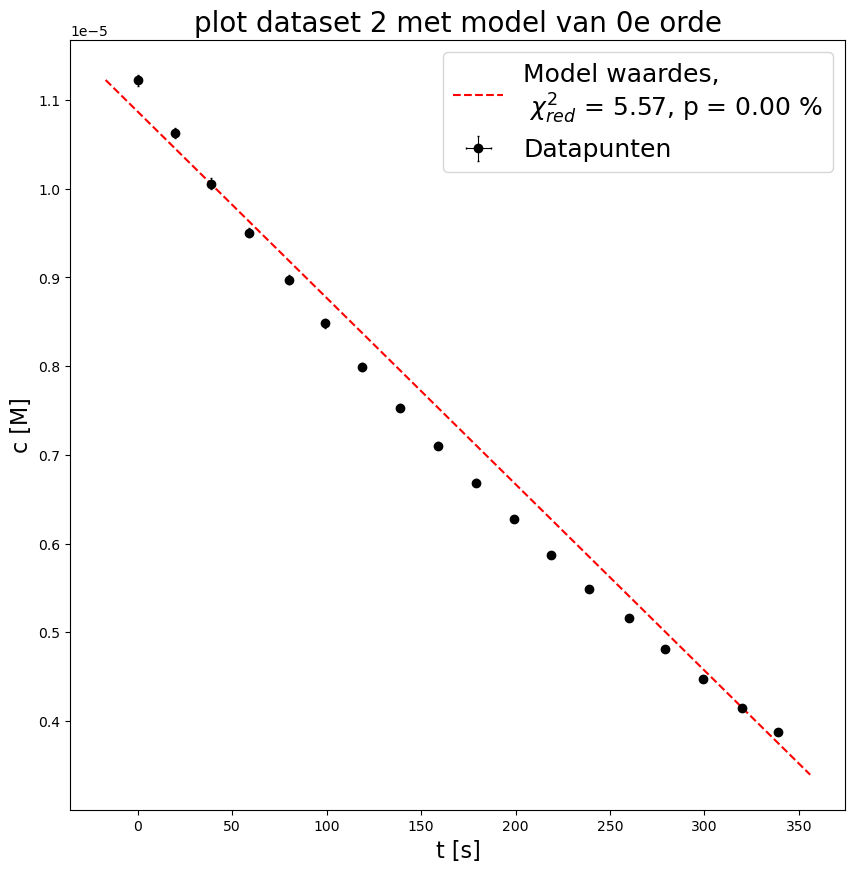

In [15]:
plot_fit(tijden_set_2, concentraties_set_2, np.full(np.shape(tijden_set_2),0), fouten_set_2**2/12, 't [s]', 'c [M]', 'plot dataset 2 met model van 0e orde', snelheidsmodel_0eorde,
          parameterwaarden, 5.57, 3.551e-12, save_name = 'dataset_2_fit_0e_orde.png',fontsize = 18, titlesize = 20, axsize = 16)

In [16]:
# tweede set metingen: 1e orde
def initial_vals(x,y):
    return [1.087e-5,2.1e-8]


parameters = ['c_0', 'k']
k2 = sp.symbols('k2')
outp = fit(parameters, snelheidsmodel_1eorde, initial_vals, tijden_set_2, concentraties_set_2 , fouten_set_2 )
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]
K2 = vector_to_datapunt(outp[1],k2)
print(K2)
print(outp)
for met in outp:
    latex_print_meting(met)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]
"""
fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.errorbar(tijden_set_2,np.log(concentraties_set_2 ),linestyle = '', label = 'gemeten', yerr = fouten_set_2 /concentraties_set_2, color = 'black', marker = 'o')
ax.set_ylabel('ln(c) [ln(M)]',fontsize = 15)
t = np.linspace(0,350)
ax.plot(t, np.log(snelheidsmodel_1eorde(t, parameterwaarden)),label = 'Model')
ax.set_title('plot dataset 2 met model van 1e orde',fontsize = 20)
ax.set_xlabel('t [s]',fontsize = 15)
ax.legend()
plt.tight_layout();plt.savefig('dataset_2_fit_1e_orde.png');plt.show()"""

Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 9.048921043272204
        x: [ 1.145e-05  3.110e-03]
      nit: 9
      jac: [-5.995e+05  1.862e+03]
 hess_inv: [[ 4.941e-15  1.793e-12]
            [ 1.793e-12  9.232e-10]]
     nfev: 165
     njev: 51
[[1.1377961890586147e-05, 1.154193040517573e-05], [0.003073690443230673, 0.003145017760929421]]
c_0 heeft als waarde: 1.1452e-05 + 9.031e-08 - 7.3659e-08 met 68% betrouwbaarheidsinterval: [1.1378e-05, 1.1542e-05] 
k heeft als waarde: 0.0031097 + 3.5319e-05 - 3.6009e-05 met 68% betrouwbaarheidsinterval: [0.0030737, 0.003145] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0.91139
De gereduceerde chi^2 waarde is: 0.56556
datapunt: k2 = [0.0031096989453960116, 3.6008502165338525e-05, 'S']
[[1.1451620616400035e-05, 9.030978877569429e-08, 'S'], [0.0031096989453960116, 3.6008502165338525e-05, 'S']]
$(1145.2 \pm 9.0)\cdot 10^{-8}$
$(311.0

"\nfig,ax = plt.subplots(1,1,figsize = (10,10))\nax.errorbar(tijden_set_2,np.log(concentraties_set_2 ),linestyle = '', label = 'gemeten', yerr = fouten_set_2 /concentraties_set_2, color = 'black', marker = 'o')\nax.set_ylabel('ln(c) [ln(M)]',fontsize = 15)\nt = np.linspace(0,350)\nax.plot(t, np.log(snelheidsmodel_1eorde(t, parameterwaarden)),label = 'Model')\nax.set_title('plot dataset 2 met model van 1e orde',fontsize = 20)\nax.set_xlabel('t [s]',fontsize = 15)\nax.legend()\nplt.tight_layout();plt.savefig('dataset_2_fit_1e_orde.png');plt.show()"

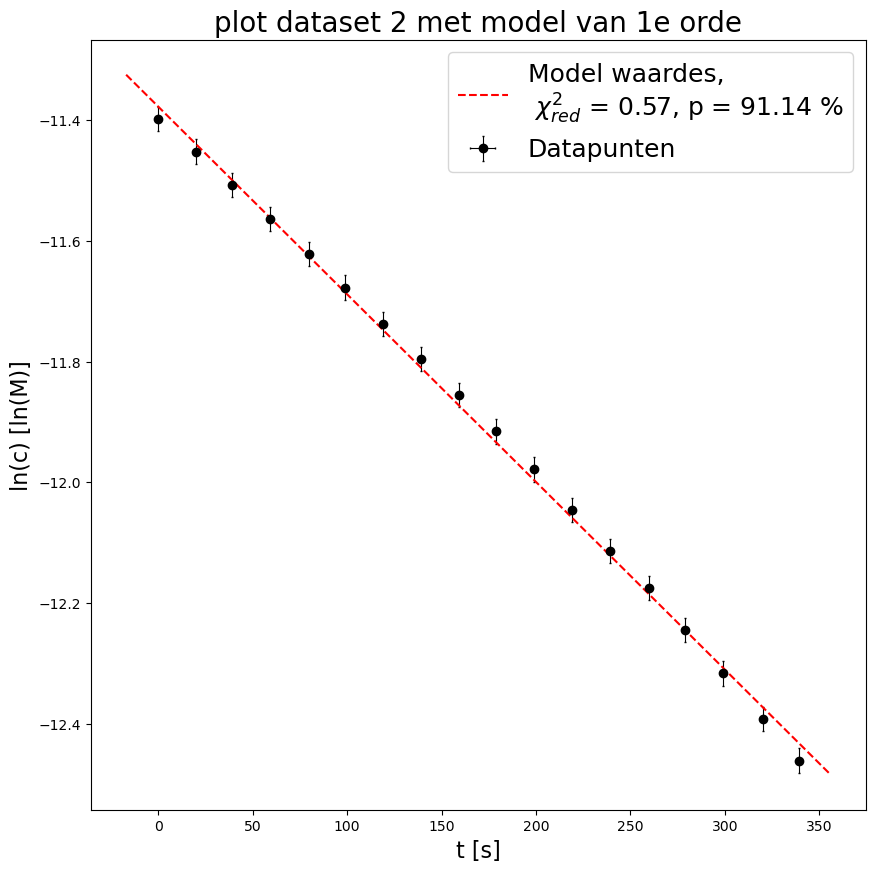

In [17]:
plot_fit(tijden_set_2, np.log(concentraties_set_2), np.full(np.shape(tijden_set_2),0), (fouten_set_2/(concentraties_set_2))**2, 't [s]', 'ln(c) [ln(M)]', 'plot dataset 2 met model van 1e orde', snelheidsmodel_1eorde_linearised,
          parameterwaarden, 0.57,0.9114, save_name = 'dataset_2_fit_1e_orde.png',fontsize = 18, titlesize = 20, axsize = 16)

In [18]:
# tweede set metingen 2e orde
def initial_vals(x,y):
    return [0.96e-5,2.1e-8]


parameters = ['c_0', 'k']
outp = fit(parameters, snelheidsmodel_2eorde, initial_vals, tijden_set_2, concentraties_set_2, fouten_set_2)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]
for met in outp:
    print(met)
    print('\n')
    latex_print_meting(met)
"""
fig,ax = plt.subplots(1,1, figsize = (10,10))
ax.errorbar(tijden_set_2,1/concentraties_set_2,linestyle = '', label = 'gemeten', yerr = fouten_set_2/(concentraties_set_2**2), color = 'black', marker = 'o')
ax.set_ylabel('1/c [M$^{-1}$]',fontsize = 15)
t = np.linspace(0,350)
ax.plot(t, 1/snelheidsmodel_2eorde(t, parameterwaarden),linestyle = '--',label = 'Model')
ax.set_title('plot dataset 2 met model van 2e orde',fontsize = 20)
ax.set_xlabel('t [s]',fontsize = 15)
ax.legend(fontsize = 18)
plt.tight_layout();plt.savefig('dataset_2_fit_2e_orde.png');plt.show()"""

Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 160.10786740214485
        x: [ 1.226e-05  4.367e+02]
      nit: 14
      jac: [-2.094e+02  2.861e-05]
 hess_inv: [[ 8.299e-15  2.716e-07]
            [ 2.716e-07  1.884e+01]]
     nfev: 144
     njev: 44
[[1.2126364283083193e-05, 1.2412089370282976e-05], [430.1596508170455, 443.38500770617645]]
c_0 heeft als waarde: 1.2261e-05 + 1.5078e-07 - 1.3494e-07 met 68% betrouwbaarheidsinterval: [1.2126e-05, 1.2412e-05] 
k heeft als waarde: 436.72 + 6.6673 - 6.5581 met 68% betrouwbaarheidsinterval: [430.16, 443.39] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 7.8244e-26
De gereduceerde chi^2 waarde is: 10.007
[1.2261305096058406e-05, 1.5078427422457027e-07, 'S']


$(122.6 \pm 1.5)\cdot 10^{-7}$
[436.7177194362203, 6.6672882699561455, 'S']


$(436.7 \pm 6.7)\cdot 10^{0}$


"\nfig,ax = plt.subplots(1,1, figsize = (10,10))\nax.errorbar(tijden_set_2,1/concentraties_set_2,linestyle = '', label = 'gemeten', yerr = fouten_set_2/(concentraties_set_2**2), color = 'black', marker = 'o')\nax.set_ylabel('1/c [M$^{-1}$]',fontsize = 15)\nt = np.linspace(0,350)\nax.plot(t, 1/snelheidsmodel_2eorde(t, parameterwaarden),linestyle = '--',label = 'Model')\nax.set_title('plot dataset 2 met model van 2e orde',fontsize = 20)\nax.set_xlabel('t [s]',fontsize = 15)\nax.legend(fontsize = 18)\nplt.tight_layout();plt.savefig('dataset_2_fit_2e_orde.png');plt.show()"

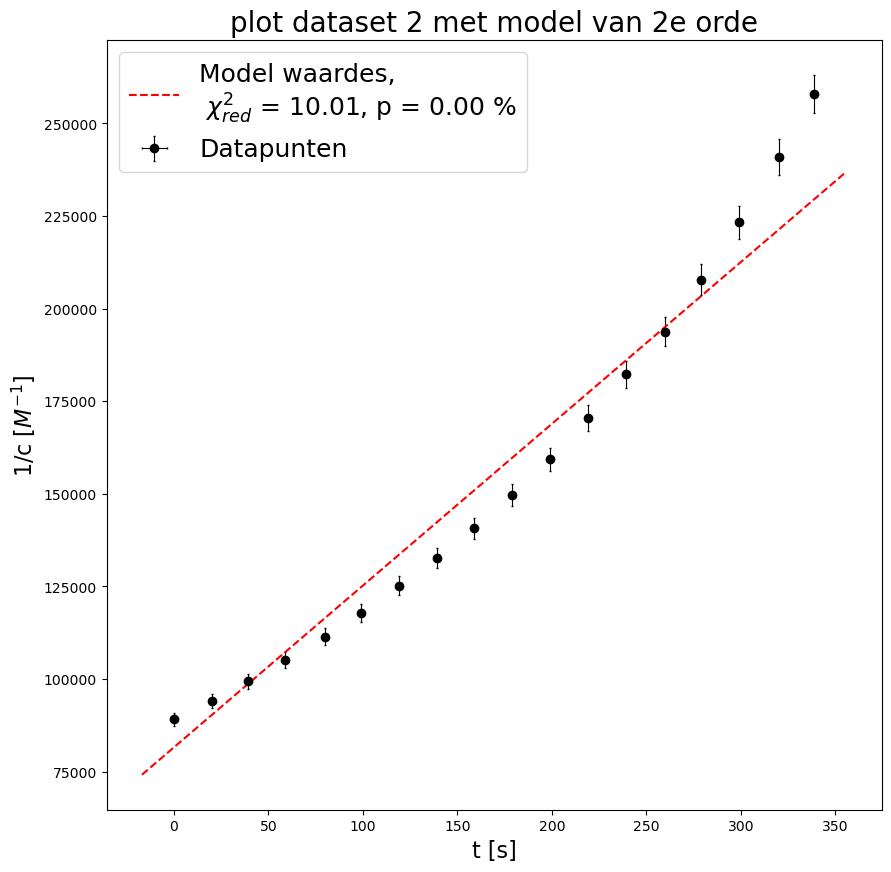

In [19]:
plot_fit(tijden_set_2, 1/concentraties_set_2, np.full(np.shape(tijden_set_2),0), (fouten_set_2/(concentraties_set_2**2))**2, 't [s]', '1/c [$M^{-1}$]', 'plot dataset 2 met model van 2e orde', snelheidsmodel_2eorde_linearised,
          parameterwaarden, 10.007, 7.824e-26, save_name = 'dataset_2_fit_2e_orde.png',fontsize = 18, titlesize = 20, axsize = 16)

In [20]:
#bepaling van de orde van NaOH


#concentraties NaOH: hou rekening met de verdunningen!
VNaOH,Vkv, c1, c2, vbegin= sp.symbols('V_{NaOH} V_{KV} c1 c2 vbegin')
NaOHstock1 = 0.060 #molair
NaOHstock2 = 0.030 #molair
NaOHV = vector_to_datapunt([2.0e-3, 2.0e-3*0.005, 'U'], VNaOH)  ###dispensette, fout is 0.5% want veel fabrikanten hebben die fout
aanlengV = vector_to_datapunt([1.0e-3, 0.007*1.0e-3, 'U'],Vkv) #die ene paper uit Iran zei dat de fout 0.7% was

concentratie1 = vergelijking(NaOHstock1*VNaOH/(VNaOH+Vkv), [VNaOH, Vkv])
concentratie2 = vergelijking(NaOHstock2*VNaOH/(VNaOH+Vkv), [VNaOH, Vkv])

C1 = data_analyse(concentratie1, [NaOHV, aanlengV], c1)
C2 = data_analyse(concentratie2, [NaOHV, aanlengV], c2)
latex_print_meting(C1)
latex_print_meting(C2)

###waarden uit de vorige metingen: ###aanpassen zodra de orde gefixt is
parameters = (k1, k2)
print(K1)
latex_print_meting(K1)
latex_print_meting(K2)
assert type(k1) == sp.Symbol
#berekeningen:
orde = sp.symbols('n')
n = vergelijking(sp.log(k1/k2)/sp.log(c1/c2), parameters = [k1, k2, c1, c1])
#help(data_analyse)
orde_NaOH = data_analyse(n, [K1, K2, C1, C2], orde)
_ = latex_print_meting(orde_NaOH, 'n_{NaOH}')
#ja lol da's dus duidelijk niet waar

$c1 = (4000.00000000000 \pm 6.6)\cdot 10^{-5}$
$c2 = (2000.00000000000 \pm 3.3)\cdot 10^{-5}$
datapunt: k1 = [0.005514408390461451, 3.567536467995094e-05, 'S']
$k1 = (551.4 \pm 3.6)\cdot 10^{-5}$
$k2 = (311.0 \pm 3.6)\cdot 10^{-5}$
$n = (82.6 \pm 1.9)\cdot 10^{-2}$


In [21]:
#bepaal de halfwaardetijden
t12_1 = vergelijking(sp.log(2)/k1, [k1])
t12_2 = vergelijking(sp.log(2)/k2, [k2])
T12_1, T12_2 = sp.symbols('T12_1 T12_1')
halfwaardetijd1 = data_analyse(t12_1, [K1], T12_1)
halfwaardetijd2 = data_analyse(t12_2, [K2], T12_2)
latex_print_meting(halfwaardetijd1)
latex_print_meting(halfwaardetijd2)

$T12_1 = (1257.00000000000 \pm 8.1)\cdot 10^{-1}$
$T12_1 = (222.9 \pm 2.6)\cdot 10^{0}$


'$T12_1 = (222.9 \\pm 2.6)\\cdot 10^{0}$'

In [22]:
#prepareer de data van de eerste set metingen: onze eigen shit
absorbanties_set_1 = []
tijd_0 = (10,56)
tijden_set_1 = []
for i in range(36): #alle meetpunten afgaan --let op! het is 0.06, niet 0.006!
    adres = "C:/Users/User/Documents/Cas/Unif/2e can/experimentele/week 12 chemie I/NaOH0.006/NaOH0.006_Absorbance__"+str(i)+'__'+str(i)+'.txt'
    file = open(adres, 'rt')
    tekst = file.read();file.close()
    tekst = tekst.split('590,095	')
    meting = float(tekst[1][:8].replace(',','.'))
    absorbanties_set_1.append(meting)
    
    datum = tekst[0].split('Mon Dec 09 11:')[1][:5]
    minuut = int(datum[:2]);seconde = int(datum[3:])

    tijdsverschil = (minuut-tijd_0[0])*60 + (seconde-tijd_0[1])
    tijden_set_1.append(tijdsverschil)

absorbanties_set_1 = np.array(absorbanties_set_1)
tijden_set_1 = np.array(tijden_set_1)
print(np.shape(absorbanties_set_1))
print(np.shape(tijden_set_1))

epsilon = 87000 #M^-1 cm^-1
l = 1 #cm
concentraties_set_1 = absorbanties_set_1/(epsilon*l)
#concentraties_set_1 = absorbanties_set_1/(epsilon*l)

fouten_set_1 = -0.02*concentraties_set_1


(36,)
(36,)


In [23]:
# eerste set metingen 0e orde
def initial_vals(x,y):
    return [-9.282873e-5-0.45,-4.5954e-7-0.19999/350]


#help(plot_fit(x_val, y_val, x_variance, y_variance, x_as_titel, y_as_titel, titel, model, parameter_vals, chi_2, p, save_name = None, size = None, savefig = False,fontsize = 5, titlesize = None, axsize = None):)

parameters = ['c_0', 'k']
outp = fit(parameters, snelheidsmodel_0eorde, initial_vals, tijden_set_1, concentraties_set_1, fouten_set_1)
print(outp)
for met in outp:
    print('\n')
    latex_print_meting(met)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]

Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 12922.027511141916
        x: [-9.158e-06 -2.516e-08]
      nit: 2
      jac: [ 1.268e+10  1.398e+10]
 hess_inv: [[ 1.173e-15  4.172e-18]
            [ 4.172e-18  1.514e-20]]
     nfev: 113
     njev: 34
[[-1.2894976026755728e-05, -9.157539993214757e-06], [-2.516282160884787e-08, -1.0320265897840544e-08]]
c_0 heeft als waarde: -9.1577e-06 + 1.8049e-10 - 3.7373e-06 met 68% betrouwbaarheidsinterval: [-1.2895e-05, -9.1575e-06] 
k heeft als waarde: -2.5162e-08 + 1.4842e-08 - 6.5817e-13 met 68% betrouwbaarheidsinterval: [-2.5163e-08, -1.032e-08] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0
De gereduceerde chi^2 waarde is: 380.06
[[-9.157720483987664e-06, (3.7372555427680646e-06, 1.8049077290631106e-10), 'S'], [-2.5162163438995425e-08, (6.581698524444117e-13, 1.4841897541154881e-08), 'S']]


[-9.157720483987664e-06, (3.737255542768

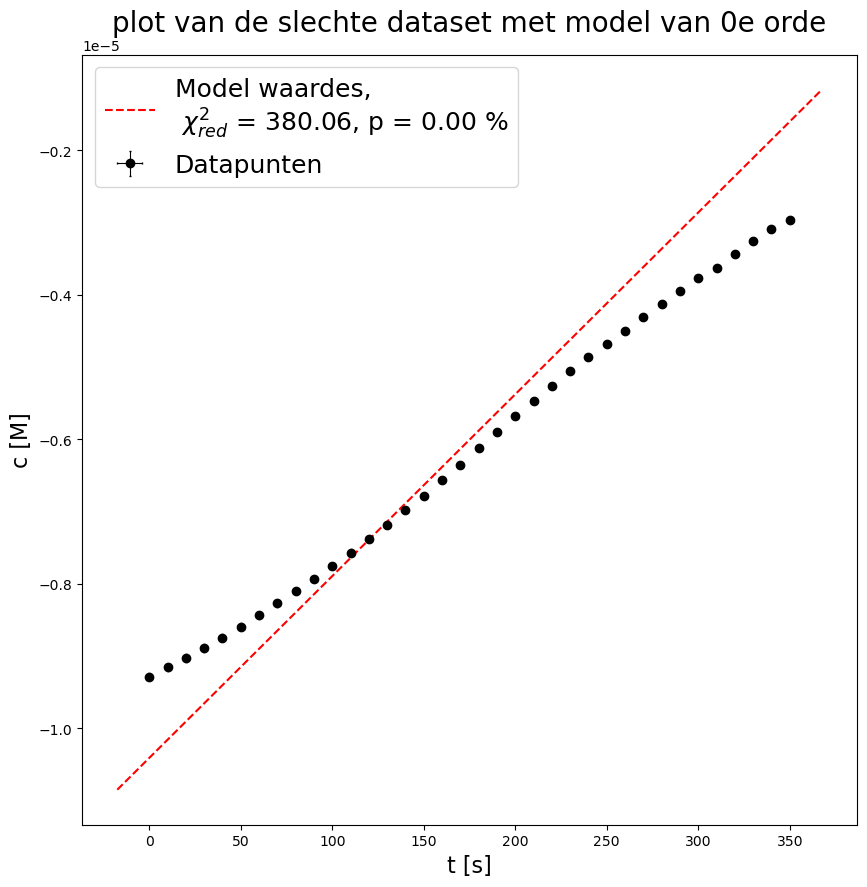

In [24]:
#plotten jeej
plot_fit(tijden_set_1, concentraties_set_1, np.full(np.shape(tijden_set_1),0), fouten_set_1**2/12, 't [s]', 'c [M]', 'plot van de slechte dataset met model van 0e orde',lambda x,params: snelheidsmodel_0eorde(x,params) - 0.125e-5,
          parameterwaarden, 380.06, 4.7e-28, save_name = 'dataset_kaka_fit_0e_orde.png',fontsize = 18, titlesize = 20, axsize = 16)

In [25]:
# eerste set metingen 0e orde
def initial_vals(x,y):
    return [np.exp(11.6),1.2/350]


#help(plot_fit(x_val, y_val, x_variance, y_variance, x_as_titel, y_as_titel, titel, model, parameter_vals, chi_2, p, save_name = None, size = None, savefig = False,fontsize = 5, titlesize = None, axsize = None):)

parameters = ['c_0', 'k']
outp = fit(parameters, snelheidsmodel_0eorde, initial_vals, tijden_set_1, -concentraties_set_1, fouten_set_1)
print(outp)
for met in outp:
    print('\n')
    latex_print_meting(met)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]

Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 103377.337694127
        x: [-5.042e-06 -4.022e-08]
      nit: 8
      jac: [-2.770e+00  7.779e+02]
 hess_inv: [[ 1.173e-15  4.172e-18]
            [ 4.172e-18  1.698e-20]]
     nfev: 207
     njev: 65
[[-5.061992263199135e-06, -5.007953340237006e-06], [-4.0223690053040644e-08, -2.532121781573233e-08]]
c_0 heeft als waarde: -5.0424e-06 + 3.447e-08 - 1.9569e-08 met 68% betrouwbaarheidsinterval: [-5.062e-06, -5.008e-06] 
k heeft als waarde: -4.0223e-08 + 1.4902e-08 - 6.5552e-13 met 68% betrouwbaarheidsinterval: [-4.0224e-08, -2.5321e-08] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0
De gereduceerde chi^2 waarde is: 3040.5
[[-5.04242338272451e-06, (1.956888047462514e-08, 3.447004248750453e-08), 'S'], [-4.022303452964273e-08, (6.555233979175162e-13, 1.4901816713910398e-08), 'S']]


[-5.04242338272451e-06, (1.956888047462514e-08, 3

C:\Users\User\AppData\Local\Temp\ipykernel_5920\2029746687.py:32: RuntimeWarning: invalid value encountered in log
  return np.log(snelheidsmodel_1eorde(t,params))


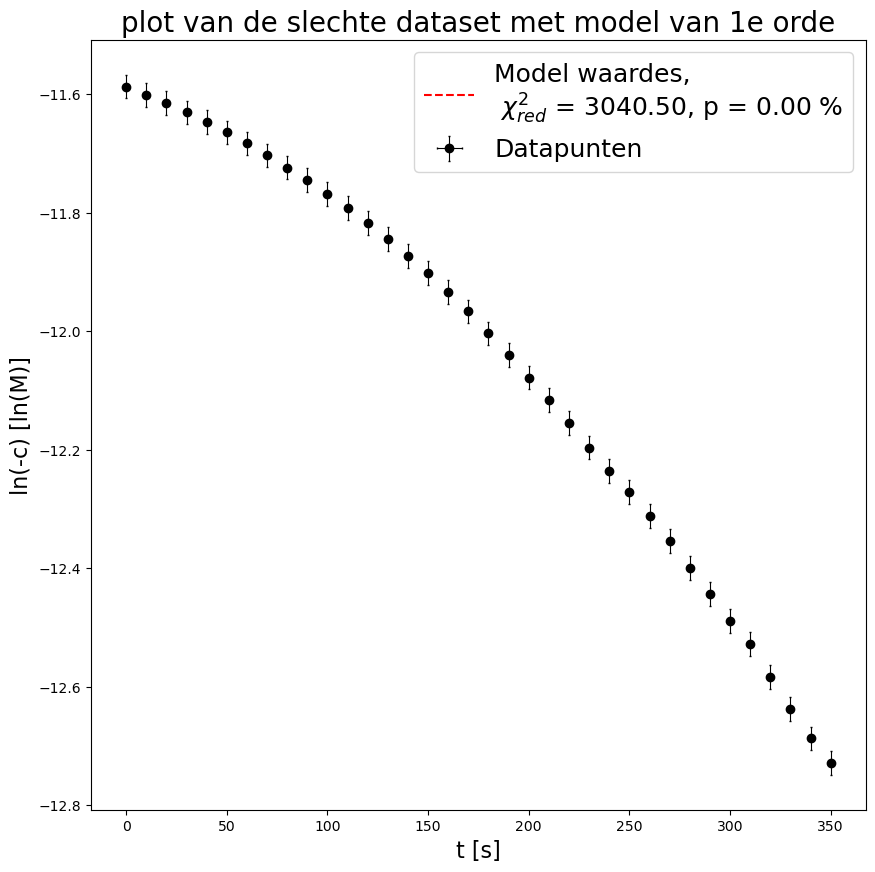

In [26]:
#plotten jeej
plot_fit(tijden_set_1, np.log(-concentraties_set_1), np.full(np.shape(tijden_set_1),0), (fouten_set_1/(concentraties_set_1))**2, 't [s]', 'ln(-c) [ln(M)]', 'plot van de slechte dataset met model van 1e orde', snelheidsmodel_1eorde_linearised,
          parameterwaarden, 3040.5, 4.7e-28, save_name = 'dataset_kaka_fit_1e_orde.png',fontsize = 18, titlesize = 20, axsize = 16)

In [27]:
# eerste set metingen 0e orde
def initial_vals(x,y):
    return [0.69e-5,2e-8]


#help(plot_fit(x_val, y_val, x_variance, y_variance, x_as_titel, y_as_titel, titel, model, parameter_vals, chi_2, p, save_name = None, size = None, savefig = False,fontsize = 5, titlesize = None, axsize = None):)

parameters = ['c_0', 'k']
outp = fit(parameters, snelheidsmodel_2eorde, initial_vals, tijden_set_1, concentraties_set_1, fouten_set_1)
print(outp)
for met in outp:
    print('\n')
    latex_print_meting(met)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]

Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1023.3967353297197
        x: [-1.099e-05 -5.225e+02]
      nit: 6
      jac: [ 7.647e+05  6.851e-03]
 hess_inv: [[ 3.459e-15  1.323e-07]
            [ 1.323e-07  1.130e+01]]
     nfev: 171
     njev: 53
[[-1.1083059733973707e-05, -1.0895366668313243e-05], [-527.8557171514336, -517.2508349515266]]
c_0 heeft als waarde: -1.0995e-05 + 9.9592e-08 - 8.8101e-08 met 68% betrouwbaarheidsinterval: [-1.1083e-05, -1.0895e-05] 
k heeft als waarde: -522.48 + 5.2292 - 5.3757 met 68% betrouwbaarheidsinterval: [-527.86, -517.25] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 6.4505e-193
De gereduceerde chi^2 waarde is: 30.1
[[-1.099495851186966e-05, 9.959184355641597e-08, 'S'], [-522.4800603508336, 5.375656800600041, 'S']]


$(-1099.5 \pm 10.0)\cdot 10^{-8}$


$(-522.5 \pm 5.4)\cdot 10^{0}$


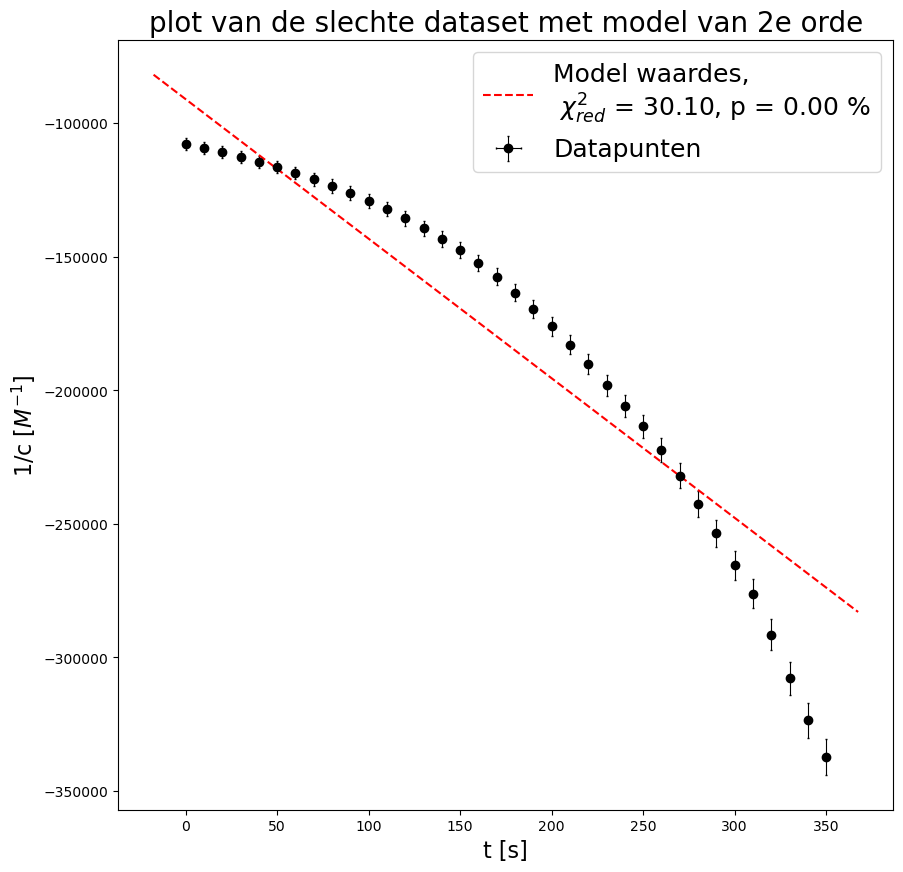

In [28]:
#plotten jeej
plot_fit(tijden_set_1, 1/concentraties_set_1, np.full(np.shape(tijden_set_1),0), (fouten_set_1/(concentraties_set_1**2))**2, 't [s]', '1/c [$M^{-1}$]', 'plot van de slechte dataset met model van 2e orde', snelheidsmodel_2eorde_linearised,
          parameterwaarden, 30.1, 4.7e-28, save_name = 'dataset_kaka_fit_2e_orde.png',fontsize = 18, titlesize = 20, axsize = 16)